In [125]:
%matplotlib inline
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import math
from __future__ import division

In [2]:
cwd = os.getcwd()

### Positive

In [186]:
labels = {"Excited": 1, 
          "Peaceful": -1,
          "NONE" : 0}

makeInt = lambda x: int(x)
convertLabels = lambda x: labels[x]
positive = np.genfromtxt('positive.csv', delimiter=',', 
                         skip_header=1, missing_values="NONE", 
                         usecols=(3,4), 
                         converters={3: makeInt,
                                    4: convertLabels})

In [188]:
positive = sorted(positive, key=lambda x: x[0])

In [189]:
ratings = []

for zscore in range(13):
    ratings.append([pair[1] for pair in positive if pair[0] == zscore])
    

In [190]:
ratingsAvg = [sum(zBin)/len(zBin) for zBin in ratings]

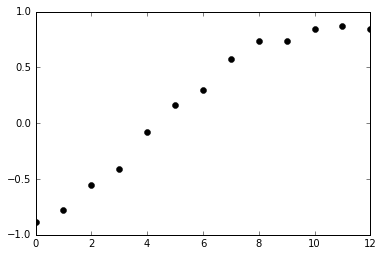

In [191]:
plt.plot(ratingsAvg, 'ko')

## Negative

In [192]:
labels = {"Angry": 1, 
          "Sad": -1,
          "NONE" : 0}

makeInt = lambda x: int(x)
convertLabels = lambda x: labels[x]
negative = np.genfromtxt('negative.csv', delimiter=',', 
                         skip_header=1, missing_values="NONE", 
                         usecols=(3,4), 
                         converters={3: makeInt,
                                    4: convertLabels})

In [194]:
negative = sorted(negative, key=lambda x: x[0])

In [195]:
ratingsNeg = []

for zscore in range(13):
    ratingsNeg.append([pair[1] for pair in negative if pair[0] == zscore])
    

In [196]:
ratingsNeg = [sum(zBin)/len(zBin) for zBin in ratingsNeg]

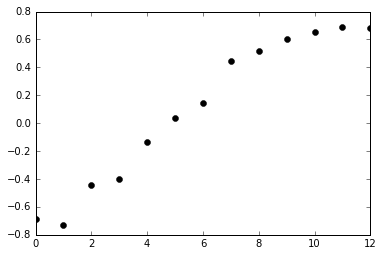

In [197]:
plt.plot(ratingsNeg, 'ko')

## Matching

In [178]:
#makeInt = lambda x: int(x)
matching = np.genfromtxt('matching.csv', delimiter=',', 
                         skip_header=1, missing_values="NONE", 
                         filling_values=-100, usecols=(3,4,5)) 
                         #converters={3: makeInt,
                         #            4: makeInt,
                         #            5: makeInt})
print len(matching)

4940


In [179]:
matching = [(int(abs(x-y)), int(z)) for x,y,z in matching if z != -100]

In [182]:
matching = sorted(matching, key=lambda x: x[0])

In [183]:
ratingsMatch = []

for zscore in range(13):
    ratingsMatch.append([pair[1] for pair in matching if pair[0] == zscore])
    

In [184]:
ratingsMatch = [sum(zBin)/len(zBin) for zBin in ratingsMatch]

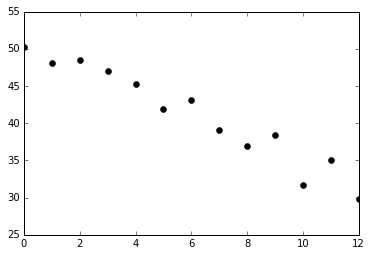

In [185]:
plt.plot(ratingsMatch, 'ko')